In [1]:
from graph import app
from langchain_core.messages import HumanMessage,AIMessage,SystemMessage

user_input = input("Enter your name (type 'quit' to exit): ")
thread={"configurable":{"thread_id":"1"}}
for event in app.stream({"name": user_input, "messages": [HumanMessage(content=user_input)]},thread,stream_mode="values"):
    event["messages"][-1].pretty_print()

c:\Users\shawn\OneDrive\Desktop\Upskill.AI\Upskill-Planner\read_rag.py:14: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceEmbeddings(model_name="BAAI/bge-large-en-v1.5")
c:\Users\shawn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange
c:\Users\shawn\OneDrive\Desktop\Upskill.AI\Upskill-Planner\read_rag.py:15: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9

Welcome shawn I have your resume in here
================================ Human Message =================================

shawn
================================ Human Message =================================

i want to be an AI engineer can you look at my resume and tell me what key skills am I missing
================================== Ai Message ==================================

rag_node
================================== Ai Message ==================================

Based on the analysis, I've identified some key skills that you may be missing for an AI engineer role. Here are the top gaps I found:

1. **Cloud platforms**: You don't have experience with cloud platforms like AWS, Google Cloud, or Azure, which are widely used in the industry.
2. **Specialized AI frameworks**: While you've listed PyTorch, TensorFlow, and Hugging Face Transformers, you might want to consider adding other frameworks like Microsoft Cognitive Toolkit (CNTK) or Apache MXNet.
3. **Explainability and int

In [1]:
from graph import app
from langchain_core.messages import HumanMessage,AIMessage,SystemMessage

user_input = input("Enter your name (type 'quit' to exit): ")
thread={"configurable":{"thread_id":"1"}}
for event in app.stream({"name": user_input, "messages": [HumanMessage(content=user_input)]},thread,stream_mode="values"):
    event["messages"][-1].pretty_print()

c:\Users\shawn\OneDrive\Desktop\Upskill.AI\Upskill-Planner\read_rag.py:14: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceEmbeddings(model_name="BAAI/bge-large-en-v1.5")
c:\Users\shawn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange
c:\Users\shawn\OneDrive\Desktop\Upskill.AI\Upskill-Planner\read_rag.py:15: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9

Welcome shawn I have your resume in here
================================ Human Message =================================

shawn
================================ Human Message =================================

i want to be an AI engineer can you look at my resume and tell me what key skills am I missing
================================== Ai Message ==================================

rag_node
================================ Human Message =================================

Based on the analysis of your skills, I've identified some key areas where you might want to focus on developing your skills to become a strong AI engineer candidate. 

You have a solid foundation in programming languages like Python, C++, C, and SQL, as well as experience with popular AI frameworks like PyTorch, TensorFlow, and Scikit-Learn. However, there are a few potential gaps in your skillset that you might want to consider addressing:

1. **Cloud computing:** While you have experience with Docker and Kubernet

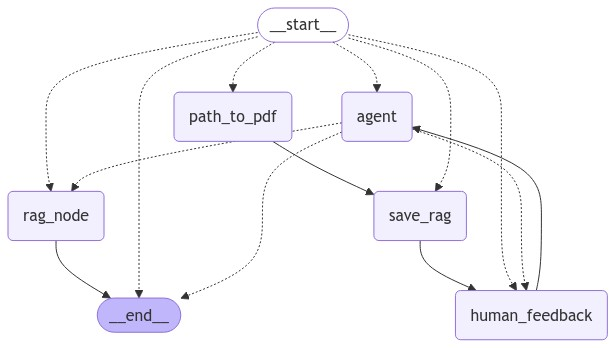

In [2]:
from IPython.display import display,Image
from graph import app
import langgraph
from langchain_groq import ChatGroq
from langgraph.graph import START,END,StateGraph
from classes import MessagesState
from langgraph.prebuilt import ToolNode,tools_condition
from langchain_core.messages import HumanMessage,AIMessage,SystemMessage
from langgraph.checkpoint.memory import MemorySaver
from read_rag import qa_chain
from rag import insert_rag
from tools import rag_retrieval

llm = ChatGroq(
    temperature=0,
    groq_api_key="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",
    model="llama-3.1-70b-versatile"
)




def check_rag_for_resume(state:MessagesState):
    name=state["name"]
    query = f"does {name} have a resume in here"
    response = qa_chain.run(query)
    if "No" in response:
        print("seems like I dont have your resume")
        return "path_to_pdf"
    elif "Yes" in response:
        print(f"Welcome {name} I have your resume in here")
        return "human_feedback"

def path_to_pdf(state:MessagesState):
    user_input=input("Enter the path to your resume:")
    return {"path": user_input, "messages": [HumanMessage(content=f"Resume path: {user_input}")]}

def human_feedback(state:MessagesState):
       user_input=input("Enter your query:")
       return {"messages":user_input}

def save_rag(state:MessagesState):
    path=state["path"]
    insert_rag(path)
    return {"messages":"resume saved successfully"}


def agent(state:MessagesState):
        user_query=state["user_query"][-1]
        ai_response2=llm.invoke([SystemMessage(content=f"You are an intelligent general assistant. You will be given a sentence. You have to tell whether the user query is an end of conversation sentence or not or if it is a resume related question or if it is a general question. If it is an end of conversation sentence just say True and if it is a resume related question just say resume and if it is a general question just say general. The sentence is {user_query}")])
        if "resume" in ai_response2.lower():
             return {"messages":[AIMessage(content="rag_node")]}
        elif "general" in ai_response2.lower():
             sys_message=SystemMessage(content="You are a helpful assistant tasked with answering the user's questions.")
             ai_response = llm.invoke([sys_message]+state["messages"])
             return {"messages": [AIMessage(content=ai_response.content)]}
        
        elif "true" in ai_response2.lower():
             return {"messages":[AIMessage(content=ai_response.content)],"messages": [AIMessage(content="END")]}

def should_continue(state:MessagesState):
      message = state["messages"][-1]
      if message.content == "END":
        return END
      elif message.content=="rag_node":
        return "rag_node"
      else:
        return "human_feedback"

graph=StateGraph(MessagesState)
graph.add_node("agent",agent)
graph.add_node("save_rag",save_rag)
graph.add_node("path_to_pdf",path_to_pdf)
graph.add_node("human_feedback",human_feedback)
graph.add_node("rag_node",rag_retrieval)
graph.add_conditional_edges(START,check_rag_for_resume)
graph.add_edge("path_to_pdf","save_rag")
graph.add_edge("save_rag","human_feedback")
graph.add_edge("human_feedback","agent")
graph.add_conditional_edges("agent",should_continue,[END, "human_feedback","rag_node"])
graph.add_edge("rag_node",END)
memory=MemorySaver()
display(Image(app.get_graph().draw_mermaid_png()))







In [4]:
from gcsa.event import Event
from gcsa.google_calendar import GoogleCalendar
from datetime import datetime
from gcsa.event import Event

calendar = GoogleCalendar('shawnthomas0507@gmail.com')
events=[]
for event in calendar:
        events.append(event)

events

[<Event 2024-12-12 23:00:00-05:00 - Learn AWS Cloud Computing Fundamentals>]

In [15]:
from datetime import datetime
from gcsa.event import Event

event = Event(
    'The Glass Menagerie',
    start=datetime(2024, 12, 12, 19, 0),
    location='philadelphia',
    minutes_before_popup_reminder=15
)
calendar.add_event(event)

<Event 2024-12-12 19:00:00-05:00 - The Glass Menagerie>